In [ ]:
!pip install --force-reinstall --no-cache-dir numpy==1.24.4
!pip install --upgrade --no-cache-dir transformers==4.36.2
!pip install --upgrade --no-cache-dir torch==2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 136.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.36.2 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,

^C


In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
# 🧼 Clean slate: uninstall problematic preinstalled versions
#!pip uninstall -y numpy transformers torch

# ✅ Install concrete, validated versions that are stable with BERT training
#!pip install --no-cache-dir numpy==1.24.4 \
#  transformers==4.36.2 \
#  torch==2.2.2 \
#  datasets==2.19.1 \
# scikit-learn==1.3.2 --quiet

In [1]:
import os
os.environ["WANDB_DISABLED"] = "true"

# ✅ Core imports
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


print("Torch Version:", torch.__version__)
import transformers
print("Transformers Version:", transformers.__version__)
print("NumPy Version:", numpy.__version__)
print("CUDA Available:", torch.cuda.is_available())

AttributeError: module 'numpy' has no attribute 'dtypes'

In [4]:
from google.colab import files
files.upload()  # Then select the kaggle.json file from your system


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejendersinghsandhu","key":"2965c49b13e3ebe213d6763bd52c4697"}'}

In [5]:
# Create kaggle directory and copy kaggle.json
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d tejendersinghsandhu/bert-base-uncased-full

Dataset URL: https://www.kaggle.com/datasets/tejendersinghsandhu/bert-base-uncased-full
License(s): unknown
 87% 337M/389M [00:06<00:01, 54.4MB/s]
100% 389M/389M [00:07<00:00, 58.2MB/s]


In [7]:
import zipfile

with zipfile.ZipFile("bert-base-uncased-full.zip", "r") as zip_ref:
    zip_ref.extractall("/content/bert-base-uncased-full")

In [8]:
import os

model_path = "/content/bert-base-uncased-full"
print("✅ Files in model path:")
print(os.listdir(model_path))

✅ Files in model path:
['bert-base-uncased-full']


In [9]:
from transformers import BertTokenizerFast, BertForSequenceClassification

# ✅ Set to the inner folder path
model_path = "/content/bert-base-uncased-full/bert-base-uncased-full"

# ✅ Load from corrected local path
tokenizer = BertTokenizerFast.from_pretrained(model_path, local_files_only=True)
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2, local_files_only=True)

print("✅ Model and Tokenizer loaded from:", model_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/bert-base-uncased-full/bert-base-uncased-full and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model and Tokenizer loaded from: /content/bert-base-uncased-full/bert-base-uncased-full


In [10]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip -q fake-and-real-news-dataset.zip -d fake_news_data


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.24GB/s]


In [11]:
import pandas as pd

# Load fake and real news
fake_df = pd.read_csv("fake_news_data/Fake.csv")
real_df = pd.read_csv("fake_news_data/True.csv")

# Add binary labels
fake_df["label_binary"] = 1
real_df["label_binary"] = 0

# Combine and shuffle
df = pd.concat([fake_df, real_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Rename and select columns
df["cleaned_statement"] = df["text"].astype(str)
df = df[["cleaned_statement", "label_binary"]].dropna()

# Show sample
df.head()

,cleaned_statement,label_binary
0,"21st Century Wire says Ben Stein, reputable pr...",1
1,WASHINGTON (Reuters) - U.S. President Donald T...,0
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,0
3,"On Monday, Donald Trump once again embarrassed...",1
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",0


In [12]:
df.to_csv("bert_ready_fake_news.csv", index=False)


In [13]:
files.download("bert_ready_fake_news.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import pandas as pd

# Assuming you uploaded the cleaned CSV earlier
bert_ready_fake_news = pd.read_csv("/content/bert_ready_fake_news.csv")

# Quick check
bert_ready_fake_news.head()

,cleaned_statement,label_binary
0,"21st Century Wire says Ben Stein, reputable pr...",1
1,WASHINGTON (Reuters) - U.S. President Donald T...,0
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,0
3,"On Monday, Donald Trump once again embarrassed...",1
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",0


In [15]:
#STEP 3: DATA PREPROCESSING

from sklearn.model_selection import train_test_split

# Extract text and labels
texts = bert_ready_fake_news["cleaned_statement"].tolist()
labels = bert_ready_fake_news["label_binary"].astype(int).tolist()

# Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# Tokenization
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [16]:
!pip install --upgrade matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 85.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cleaned_statement  44898 non-null  object
 1   label_binary       44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB
None

📈 Class Distribution (label_binary):
label_binary
1    23481
0    21417
Name: count, dtype: int64


<ipython-input-17-1269336726>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bert_ready_fake_news, x="label_binary", palette="viridis")


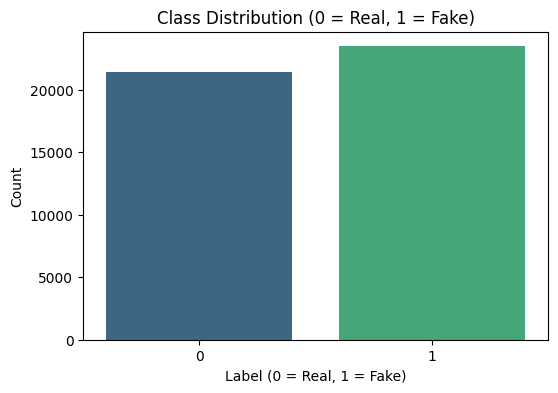

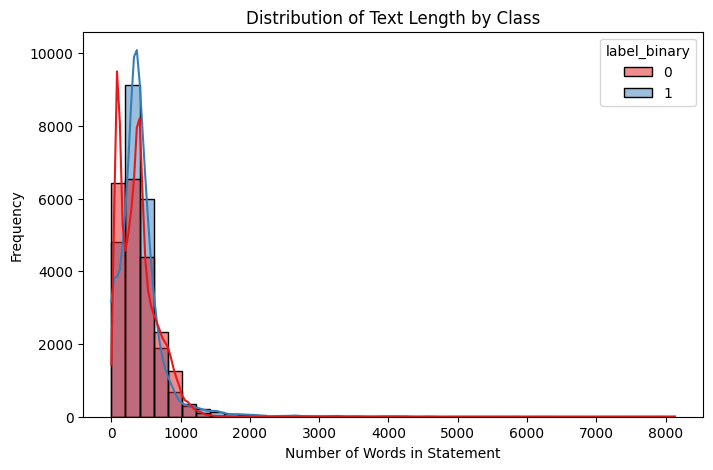

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("📊 Dataset Info:")
print(bert_ready_fake_news.info())

# Class distribution
print("\n📈 Class Distribution (label_binary):")
print(bert_ready_fake_news["label_binary"].value_counts())

# Visualize class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=bert_ready_fake_news, x="label_binary", palette="viridis")
plt.title("Class Distribution (0 = Real, 1 = Fake)")
plt.xlabel("Label (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.show()

# Text length distribution
bert_ready_fake_news["text_length"] = bert_ready_fake_news["cleaned_statement"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(data=bert_ready_fake_news, x="text_length", bins=40, hue="label_binary", palette="Set1", kde=True)
plt.title("Distribution of Text Length by Class")
plt.xlabel("Number of Words in Statement")
plt.ylabel("Frequency")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-18-3346235201>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette="cubehelix")


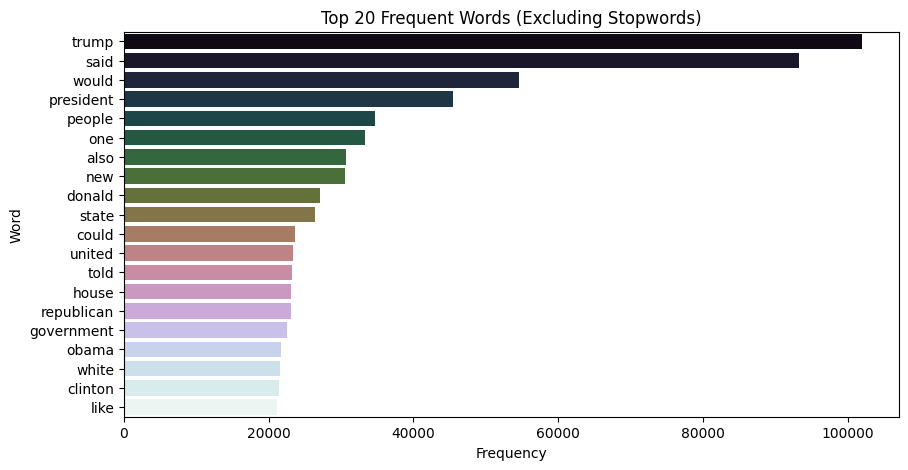

In [18]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

# Set of English stopwords
stop_words = set(stopwords.words("english"))

# Flatten all words into a single list, excluding stopwords
all_words = [
    word
    for text in bert_ready_fake_news["cleaned_statement"]
    for word in text.lower().split()
    if word not in stop_words and word.isalpha()
]

# Count frequency
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=[w[1] for w in common_words], y=[w[0] for w in common_words], palette="cubehelix")
plt.title("Top 20 Frequent Words (Excluding Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

<ipython-input-19-3452401828>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_real], y=[x[0] for x in top_real], ax=axes[0], palette="Blues_d")
<ipython-input-19-3452401828>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_fake], y=[x[0] for x in top_fake], ax=axes[1], palette="Reds_d")


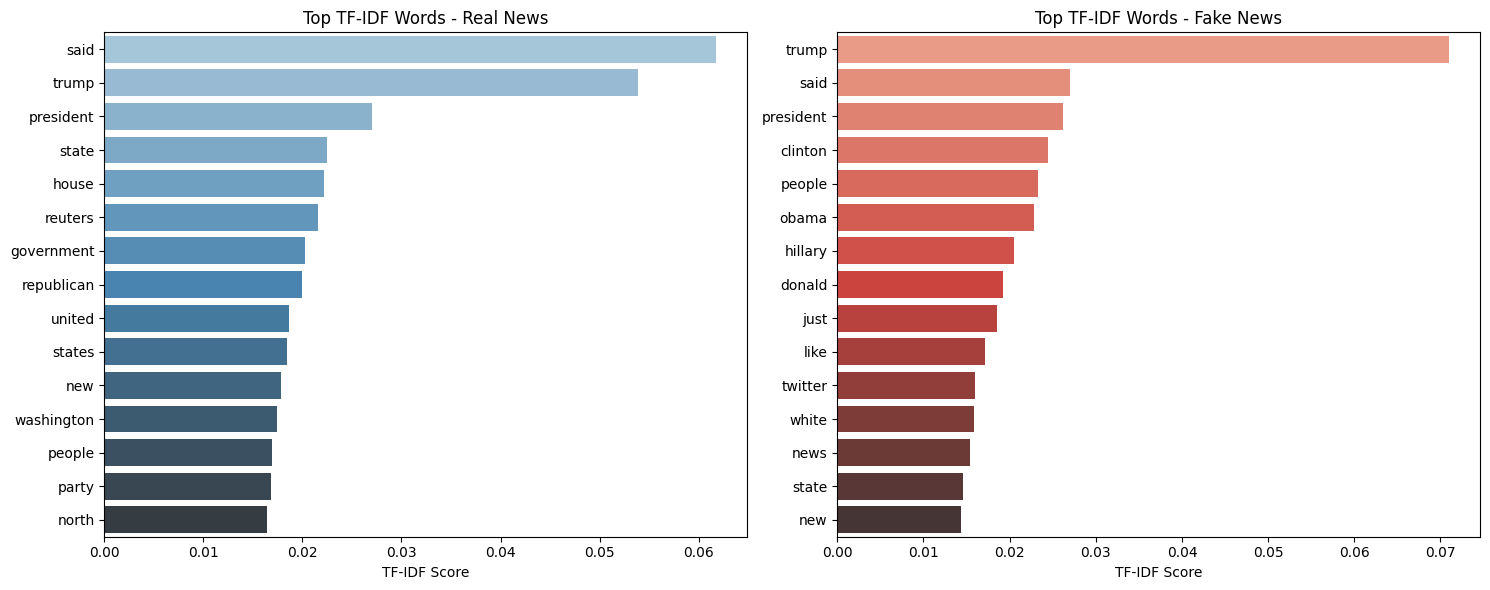

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Separate real vs fake
real_texts = bert_ready_fake_news[bert_ready_fake_news["label_binary"] == 0]["cleaned_statement"]
fake_texts = bert_ready_fake_news[bert_ready_fake_news["label_binary"] == 1]["cleaned_statement"]

def get_top_tfidf_words(text_series, top_n=15):
    vec = TfidfVectorizer(stop_words="english", max_features=5000)
    tfidf_matrix = vec.fit_transform(text_series)
    mean_scores = tfidf_matrix.mean(axis=0).A1
    vocab = vec.get_feature_names_out()
    top_indices = mean_scores.argsort()[::-1][:top_n]
    return [(vocab[i], mean_scores[i]) for i in top_indices]

# Top TF-IDF words
top_real = get_top_tfidf_words(real_texts)
top_fake = get_top_tfidf_words(fake_texts)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=[x[1] for x in top_real], y=[x[0] for x in top_real], ax=axes[0], palette="Blues_d")
axes[0].set_title("Top TF-IDF Words - Real News")
axes[0].set_xlabel("TF-IDF Score")

sns.barplot(x=[x[1] for x in top_fake], y=[x[0] for x in top_fake], ax=axes[1], palette="Reds_d")
axes[1].set_title("Top TF-IDF Words - Fake News")
axes[1].set_xlabel("TF-IDF Score")

plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = bert_ready_fake_news["cleaned_statement"]
y = bert_ready_fake_news["label_binary"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    ngram_range=(1, 2)  # Unigrams + Bigrams
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluation
print("🔍 Logistic Regression - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

🔍 Logistic Regression - Performance
Accuracy: 0.9884187082405346

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [23]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

print("🔍 SVM - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


🔍 SVM - Performance
Accuracy: 0.9948775055679288

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4284
           1       0.99      1.00      1.00      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [24]:
from transformers import BertTokenizerFast
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
import torch

# Step 1: Split the Data
train_df, val_df = train_test_split(
    bert_ready_fake_news,
    test_size=0.2,
    stratify=bert_ready_fake_news['label_binary'],
    random_state=42
)

# Step 2: Tokenization with batching to reduce memory usage
def batch_tokenize(texts, tokenizer, batch_size=1000):
    input_ids = []
    attention_masks = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        encodings = tokenizer(batch, truncation=True, padding=True, max_length=128)
        input_ids.extend(encodings['input_ids'])
        attention_masks.extend(encodings['attention_mask'])
    return {"input_ids": input_ids, "attention_mask": attention_masks}

print("🔄 Tokenizing training data...")
train_encodings = batch_tokenize(train_df['cleaned_statement'].tolist(), tokenizer)

print("🔄 Tokenizing validation data...")
val_encodings = batch_tokenize(val_df['cleaned_statement'].tolist(), tokenizer)

# Step 3: Define Dataset Class
class FakeNewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

# Step 4: Create Dataset Objects
train_dataset = FakeNewsDataset(train_encodings, train_df['label_binary'].tolist())
val_dataset = FakeNewsDataset(val_encodings, val_df['label_binary'].tolist())

print("✅ BERT Datasets Prepared Successfully.")

🔄 Tokenizing training data...
🔄 Tokenizing validation data...
✅ BERT Datasets Prepared Successfully.


In [25]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

# Define compute_metrics for evaluation
def compute_metrics(eval_pred):
    import numpy as np
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support

    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


# Define training arguments
training_args = TrainingArguments(
    output_dir="./bert_model_output",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=1,
    logging_dir="./logs",
    logging_steps=10,
    report_to="none",
    seed=42
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


AttributeError: module 'numpy' has no attribute 'dtypes'

In [ ]:
# Start training
trainer.train()